In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt

In [2]:
mybirthday = datetime.datetime(1983, 1, 15, 7, 15, 0, 2750)

In [3]:
print(mybirthday)

1983-01-15 07:15:00.002750


In [4]:
type(mybirthday)

datetime.datetime

In [5]:
mytime = datetime.datetime.now()

In [6]:
print(mytime)

2023-03-02 13:21:05.710570


In [7]:
myage = mytime-mybirthday

In [8]:
type(myage)

datetime.timedelta

In [9]:
myage.days/365

40.153424657534245

In [10]:
! head ../data/ERSST_nearForks.csv

Time,Extended reconstructed sea surface temperature
Jan 1854,7.682585
Feb 1854,7.798013
Mar 1854,8.468447
Apr 1854,10.0658
May 1854,8.840645
Jun 1854,11.99873
Jul 1854,13.86106
Aug 1854,13.79358
Sep 1854,13.40161


In [11]:
df = pd.read_csv('../data/ERSST_nearForks.csv', parse_dates=[0])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Time                                            2028 non-null   datetime64[ns]
 1   Extended reconstructed sea surface temperature  2028 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.8 KB


<AxesSubplot:>

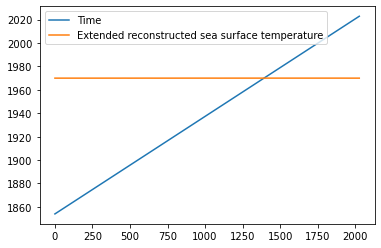

In [13]:
df.plot()

Let's pretend like we're startig from scratch with an array of values:

In [14]:
temps = df.iloc[:,1].tolist()

In [15]:
type(temps)

list

In [16]:
dates = pd.date_range('1854-01', periods=df.shape[0], freq='MS')

In [17]:
dates

DatetimeIndex(['1854-01-01', '1854-02-01', '1854-03-01', '1854-04-01',
               '1854-05-01', '1854-06-01', '1854-07-01', '1854-08-01',
               '1854-09-01', '1854-10-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', length=2028, freq='MS')

In [18]:
print(df.iloc[-1][0])

2022-12-01 00:00:00


In [19]:
sst = pd.Series(temps, index=dates)

In [20]:
sst.loc['2022-01':'2022-12']

2022-01-01     8.078298
2022-02-01     7.898858
2022-03-01     8.296480
2022-04-01     9.060289
2022-05-01    10.690230
2022-06-01    12.571850
2022-07-01    15.114260
2022-08-01    16.183050
2022-09-01    15.658580
2022-10-01    13.926420
2022-11-01    10.873330
2022-12-01     8.892098
Freq: MS, dtype: float64

<AxesSubplot:>

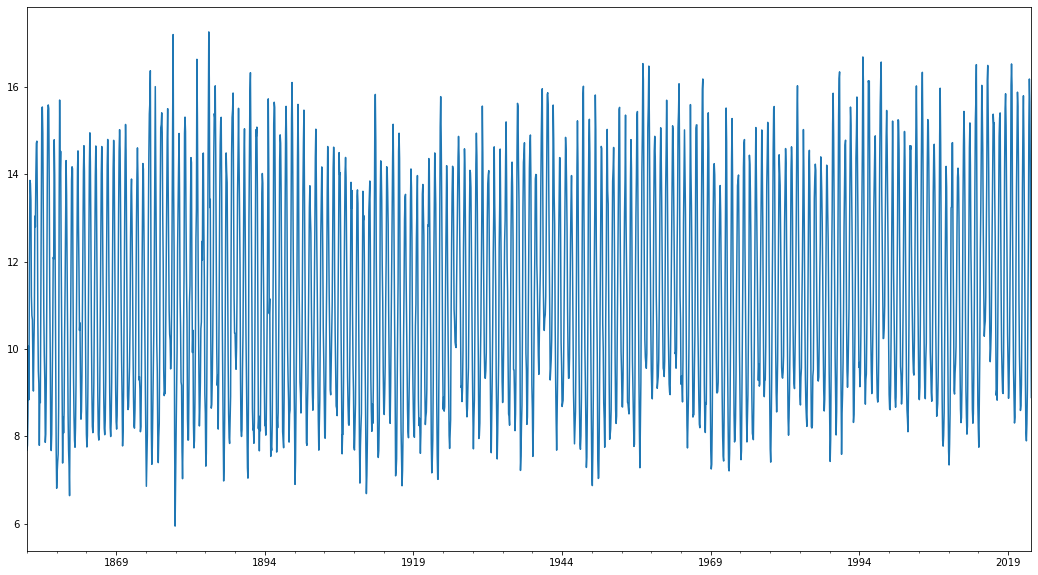

In [21]:
sst.plot(figsize=(18,10))

<AxesSubplot:>

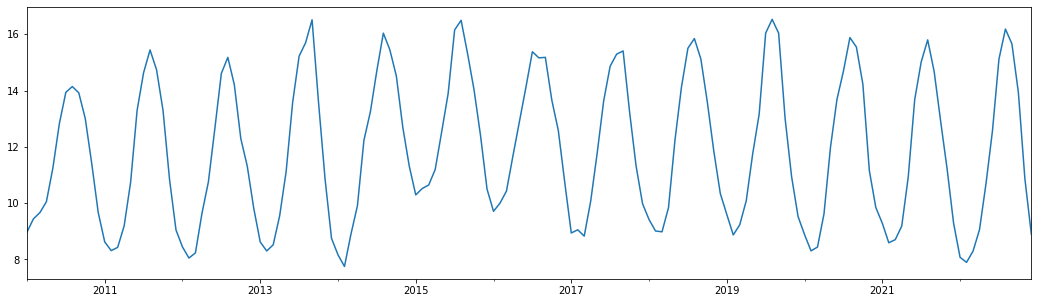

In [22]:
sst.loc['2010':'2022'].plot(figsize=(18,5))

Let's resample our data to a uniform sample rate of 30 days:

In [31]:
sst_reg = sst.resample("30D").ffill()

<AxesSubplot:>

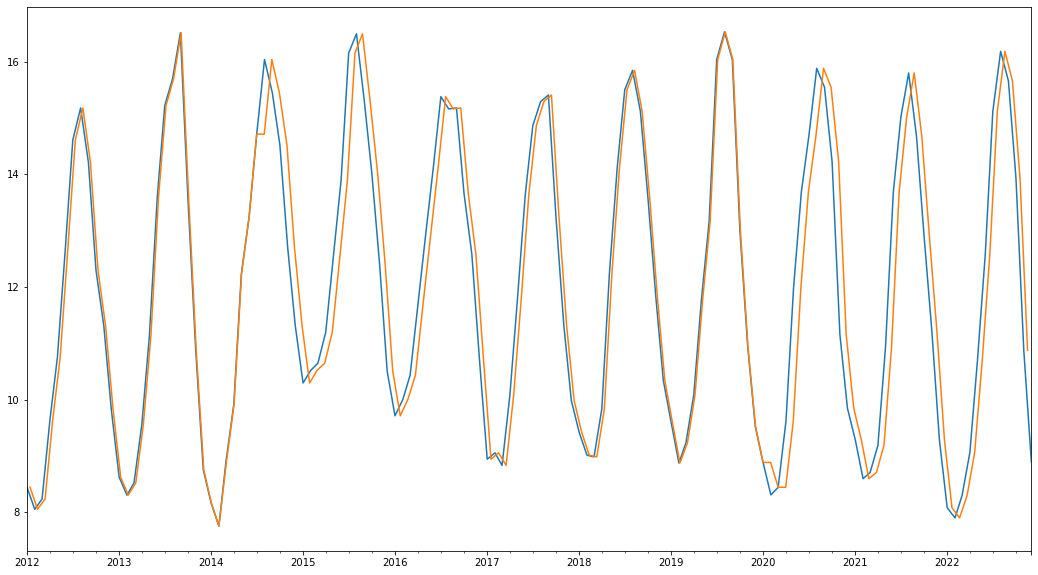

In [32]:
sst.loc['2012':'2022'].plot(figsize=(18,10))
sst_reg.loc['2012':'2022'].plot()

In [33]:
sst_reg.loc['2020':'2022']

2020-01-01     8.883529
2020-01-31     8.883529
2020-03-01     8.442430
2020-03-31     8.442430
2020-04-30     9.618597
2020-05-30    11.979400
2020-06-29    13.684600
2020-07-29    14.686490
2020-08-28    15.881450
2020-09-27    15.544550
2020-10-27    14.225620
2020-11-26    11.155250
2020-12-26     9.844648
2021-01-25     9.286531
2021-02-24     8.594229
2021-03-26     8.705052
2021-04-25     9.187806
2021-05-25    10.926470
2021-06-24    13.677040
2021-07-24    15.014510
2021-08-23    15.799060
2021-09-22    14.677730
2021-10-22    12.911790
2021-11-21    11.216630
2021-12-21     9.287827
2022-01-20     8.078298
2022-02-19     7.898858
2022-03-21     8.296480
2022-04-20     9.060289
2022-05-20    10.690230
2022-06-19    12.571850
2022-07-19    15.114260
2022-08-18    16.183050
2022-09-17    15.658580
2022-10-17    13.926420
2022-11-16    10.873330
Freq: 30D, dtype: float64

In [37]:
import scipy
import numpy as np

Here we're taking the Fourier Transform of our SST

In [38]:
freq_spec = np.fft.fft(sst_reg.values)

In [39]:
# First lets grab the length of our record in samples
N = sst_reg.shape[0]
print(N)

2057


In [43]:
#period in between samples of our discretly sampled data
t = 30 #day

#not sample rate:
sr=1/t

#get the total duration of our record:
T = N*t
print(T/365)

169.06849315068493


In [45]:
freq = np.fft.fftfreq(N,t)
freq.shape

(2057,)

In [46]:
print(max(freq))

0.016658564252147137


In [47]:
print(sr/2)

0.016666666666666666


Let's plot it up:

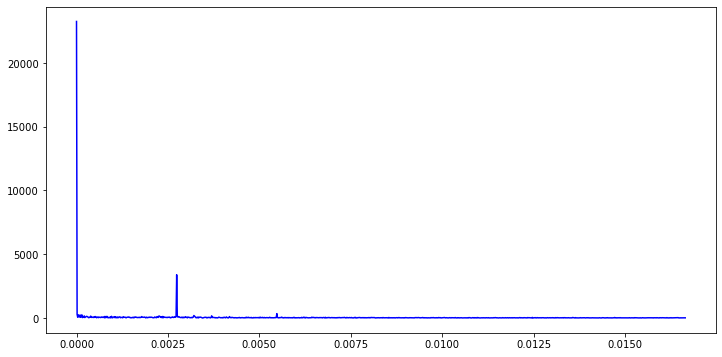

In [49]:
#grab positive side of the spectrum
n_oneside = N//2 

f_oneside = freq[:n_oneside]
f_spec_oneside = np.abs(freq_spec[:n_oneside])

plt.figure(figsize = (12,6))
plt.plot(f_oneside, f_spec_oneside, 'b')

/var/folders/dr/7qx5y5kj46z_9gs_10d9mxkh0000gn/T/ipykernel_27957/3166245131.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/f_oneside/365, f_spec_oneside, 'b')


(0.0, 25.0)

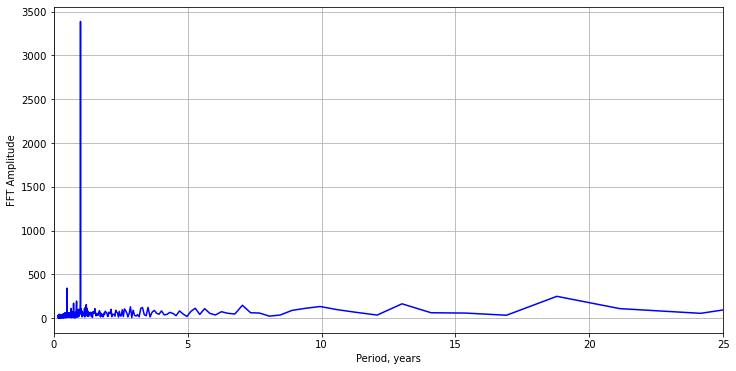

In [51]:
plt.figure(figsize = (12,6))
plt.plot(1/f_oneside/365, f_spec_oneside, 'b')
plt.xlabel('Period, years')
plt.ylabel('FFT Amplitude')
plt.grid()

plt.xlim((0, 25))

In [52]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
# converting my timeseries back to ... a number
# this will be days relative to the start of my record

dt = (sst_reg.index - sst_reg.index[0]).days.to_numpy()

dt.shape

(2057,)

In [54]:
X = dt.reshape(-1,1)
X.shape

(2057, 1)

In [55]:
y = sst_reg.to_numpy()

Now for the model fit - this is how sklearn does it - 
We define a model!

In [59]:
#initialize my linear model
regr = linear_model.LinearRegression()

#fit the model based on our data and then make a predicion using our model
regr.fit(X,y)
y_pred = regr.predict(X)

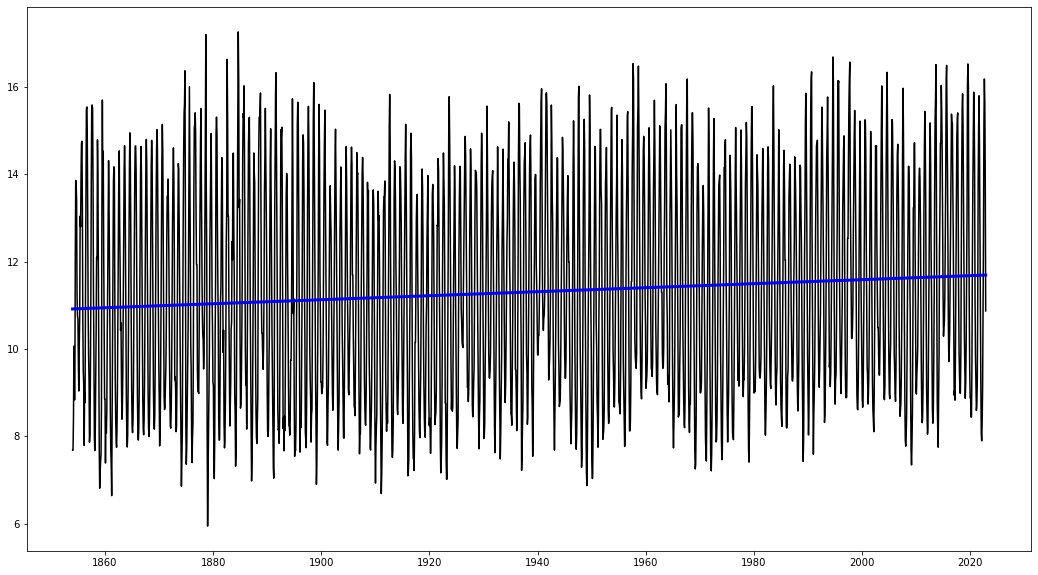

In [61]:
plt.figure(figsize=(18,10))
plt.plot(sst_reg.index, y, color="black")
plt.plot(sst_reg.index, y_pred, color="blue", linewidth=3)

In [62]:
regr.coef_

array([1.25752462e-05])

In [63]:
regr.intercept_

10.918364670257713

In [64]:
r2_score(y,y_pred)

0.00803451260349397

In [86]:
sst_final= pd.DataFrame({ 'sst': sst_reg})
sst_final

sst_reg.shape

(2058,)

In [77]:
plt.figure()
ax1 = sst_final.plot(figsize=(15, 9), linewidth=1, fontsize=16)

TypeError: no numeric data to plot

<Figure size 432x288 with 0 Axes>